In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [121]:
from warnings import filterwarnings
filterwarnings('ignore')

In [122]:
data=pd.read_csv('zomato.csv')
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [124]:
data.isnull().any()

url                            False
address                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
phone                           True
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

In [125]:
data.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [126]:
data.isna().any()

url                            False
address                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                          False
phone                           True
location                        True
rest_type                       True
dish_liked                      True
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

# Data cleaning

In [127]:
#remove Nan values

In [128]:
cols=[]                          #find Nan value columns
for feature in data.columns:
    if(data[feature].isnull().sum()>0):
        cols.append(feature)
cols


['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [129]:
#find percentage of missing values
for feature in cols:
    print('{} has {} percentage of Nan values'.format(feature,np.round(data[feature].isnull().sum()/len(data)*100,2)))

rate has 15.03 percentage of Nan values
phone has 2.34 percentage of Nan values
location has 0.04 percentage of Nan values
rest_type has 0.44 percentage of Nan values
dish_liked has 54.29 percentage of Nan values
cuisines has 0.09 percentage of Nan values
approx_cost(for two people) has 0.67 percentage of Nan values


In [130]:
data.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [131]:
#firstly we can fix null values of rate
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [132]:
data.dropna(subset=['rate'],inplace=True) #remove Nan values from rate solumn

In [133]:
#data['rate']=data['rate'].str.split('/')
#data['rate']

In [134]:
def split(x):
    return x.split('/')[0]

In [135]:
data['rate']=data['rate'].apply(split)     #split our rate values
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [136]:
data['rate'].replace(['NEW','-'],0,inplace=True)   #replace NEW and - values to 0

In [137]:
data['rate']=data['rate'].astype(float)   #convert rate column to float type

In [138]:
a=data['rate'].unique()
print(sorted(a))  #sorted list of unique values in rate column

[0.0, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      43942 non-null  object 
 1   name                         43942 non-null  object 
 2   online_order                 43942 non-null  object 
 3   book_table                   43942 non-null  object 
 4   rate                         43942 non-null  float64
 5   votes                        43942 non-null  int64  
 6   location                     43942 non-null  object 
 7   rest_type                    43791 non-null  object 
 8   cuisines                     43931 non-null  object 
 9   approx_cost(for two people)  43690 non-null  object 
 10  reviews_list                 43942 non-null  object 
 11  menu_item                    43942 non-null  object 
 12  listed_in(type)              43942 non-null  object 
 13  listed_in(city) 

In [140]:
#remove null values from rest_type column

In [141]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [142]:
data['rest_type'].isna().sum()  #find nan values in the column

151

In [143]:
data['rest_type']=data['rest_type'].fillna(data['rest_type'].mode()[0]) #fill nan value with max freq value in dataset
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [144]:
data['rest_type'].isna().sum()

0

In [145]:
#fix null values from cuisines colummn

In [146]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [147]:
data['cuisines'].isna().sum()

11

In [148]:
data.isna().any()

address                        False
name                           False
online_order                   False
book_table                     False
rate                           False
votes                          False
location                       False
rest_type                      False
cuisines                        True
approx_cost(for two people)     True
reviews_list                   False
menu_item                      False
listed_in(type)                False
listed_in(city)                False
dtype: bool

In [149]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [150]:
data['approx_cost(for two people)'].isna().sum()

252

In [151]:
data.dropna(subset=['approx_cost(for two people)'],inplace=True)
data.dropna(subset=['cuisines'],inplace=True)
data.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# visualization

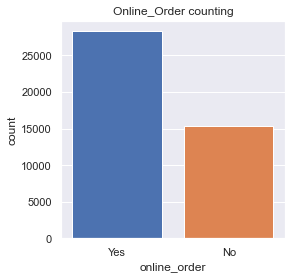

In [152]:
#online order
sns.set_theme(style="darkgrid")
online=data['online_order']
fig,ax=plt.subplots(figsize=(4,4))
sns.countplot(x=online,saturation=1)
plt.title('Online_Order counting')
plt.show()

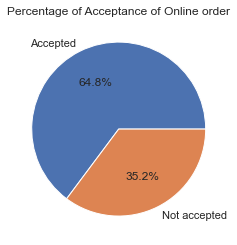

In [153]:
#pie chart
x=data['online_order'].value_counts()
labels=['Accepted','Not accepted']
plt.pie(x,labels=labels,radius=1,autopct='%0.1f%%')
plt.title('Percentage of Acceptance of Online order')
plt.show()

In [154]:
data['online_order'].value_counts()

Yes    28300
No     15382
Name: online_order, dtype: int64

In [155]:
#ratio between restaurants that provide and do not provide table booking
x=data['online_order'].value_counts()
labels=['Accepted','Not accepted']
fig=px.pie(data,values=x,names=labels,title='Percentage of Acceptance of Online order')
fig.show()

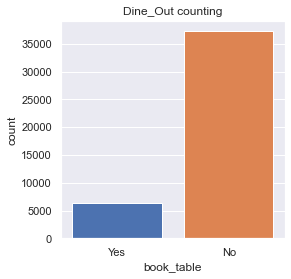

In [156]:
#table booking
fig,ax=plt.subplots(figsize=(4,4))
sns.countplot(x=data['book_table'],saturation=1)
plt.title('Dine_Out counting')
plt.show()

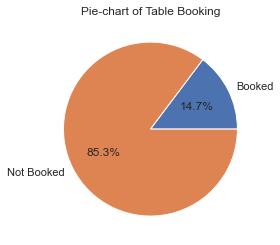

In [157]:
#pie chart
x=data['book_table'].value_counts()[::-1]
labels=['Booked','Not Booked']
plt.pie(x,labels=labels,radius=1,autopct='%0.1f%%')
plt.title('Pie-chart of Table Booking')
plt.show()

In [158]:
#online_order piechart
import plotly.express as px
labels=['Booked','Not Booked']
x=data['book_table'].value_counts()
fig = px.pie(data,values=x,names=labels,title='Ratio of Table booking')
fig.show()

In [159]:
data['book_table'].value_counts()

No     37249
Yes     6433
Name: book_table, dtype: int64

In [160]:
#restaurants name analysis
#how much unique restaurants are there?

In [161]:
print('Number of unique restaurants in bangalore region:',data['name'].nunique())

Number of unique restaurants in bangalore region: 7132


In [162]:
#location analysis

In [163]:
print('number of unique location in dataset:',data['location'].nunique())

number of unique location in dataset: 92


In [164]:
data['location'].value_counts()[0:11]

BTM                      4237
Koramangala 5th Block    2358
HSR                      2113
Indiranagar              1892
JP Nagar                 1849
Jayanagar                1711
Whitefield               1684
Marathahalli             1488
Bannerghatta Road        1318
Koramangala 6th Block    1103
Brigade Road             1084
Name: location, dtype: int64

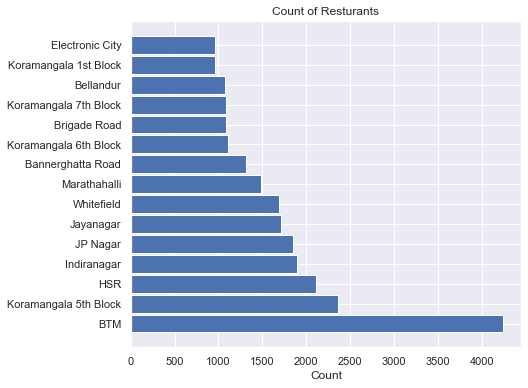

In [165]:
#plot  number of restaurants in banglore based on count first maximum 15 location 
x=dict(data['location'].value_counts()[0:15])
a=list(x.values())
b=list(x.keys())
fig,ax=plt.subplots(figsize=(7,6))
plt.barh(width=a,y=b,height=0.9)
plt.xlabel('Count')
plt.title('Count of Resturants')
plt.show()

In [166]:
'''#which location have the least restaurants
x=dict(data['name'].value_counts()[-10:])
a=list(x.keys())
b=list(x.values())
plt.barh(y=a,width=b)'''

"#which location have the least restaurants\nx=dict(data['name'].value_counts()[-10:])\na=list(x.keys())\nb=list(x.values())\nplt.barh(y=a,width=b)"

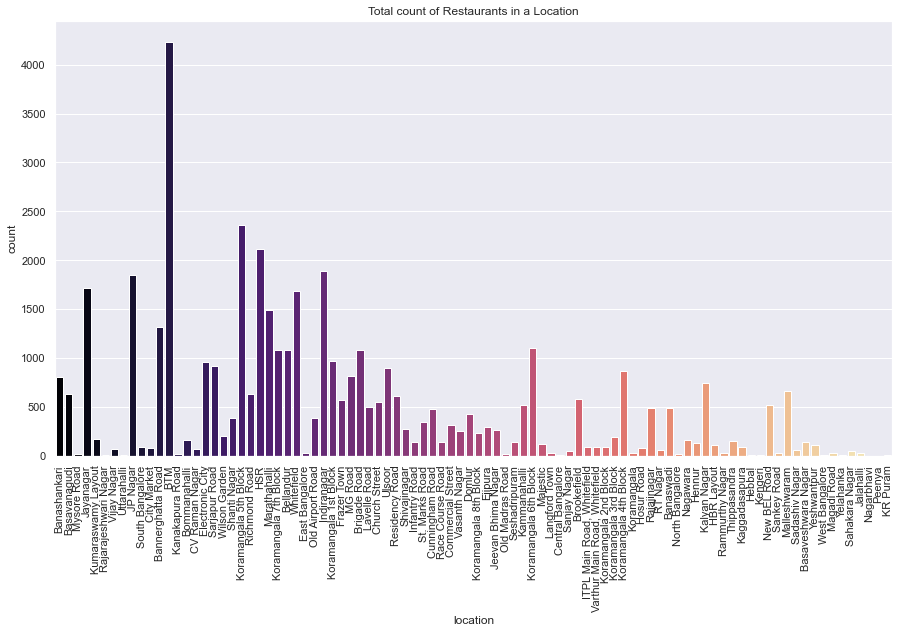

In [167]:
#plot location count
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(x=data['location'],palette='magma')
plt.xticks(rotation=90)
plt.title('Total count of Restaurants in a Location')
plt.show()

In [168]:
#list of unique restaurants in a location
restaurant=[]
location=[]
for key,location_data in data.groupby('location'):
    location.append(key)
    restaurant.append(len(location_data['name'].unique()))

In [169]:
df_total=pd.DataFrame(zip(location,restaurant)) #creating dataframe
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)#this shows the whitefield and btm has the maximum number of restaurant

restaurant
location                     
Bellandur                 284
Jayanagar                 311
Bannerghatta Road         361
JP Nagar                  400
Indiranagar               463
Electronic City           517
Marathahalli              523
HSR                       550
BTM                       581
Whitefield                630

<AxesSubplot:xlabel='location'>

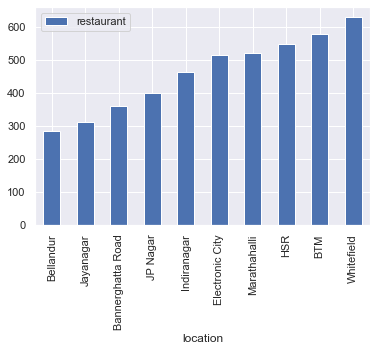

In [170]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

<AxesSubplot:xlabel='location'>

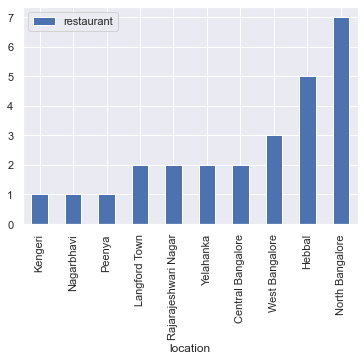

In [171]:
df_total.sort_values(by='restaurant').head(10).plot.bar()

In [172]:
#using plotly
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [173]:
trace1=go.Bar(x=df_total['restaurant'].nlargest(10).index,y=df_total['restaurant'].nlargest(10),name='Priority')
iplot([trace1])

In [174]:
#restaurant count based on location using 
restaurant_location=data['location'].value_counts()[:20]
d=go.Bar(x=restaurant_location.index,y=restaurant_location)
iplot([d])

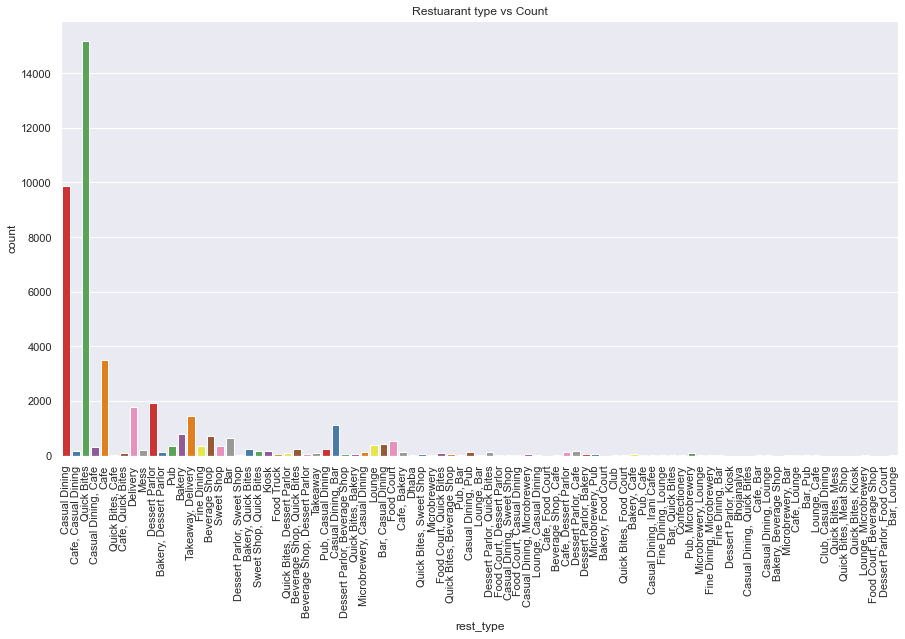

In [175]:
#restuarant type
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(x=data['rest_type'],palette='Set1')
plt.xticks(rotation=90)
plt.title('Restuarant type vs Count')
plt.show()


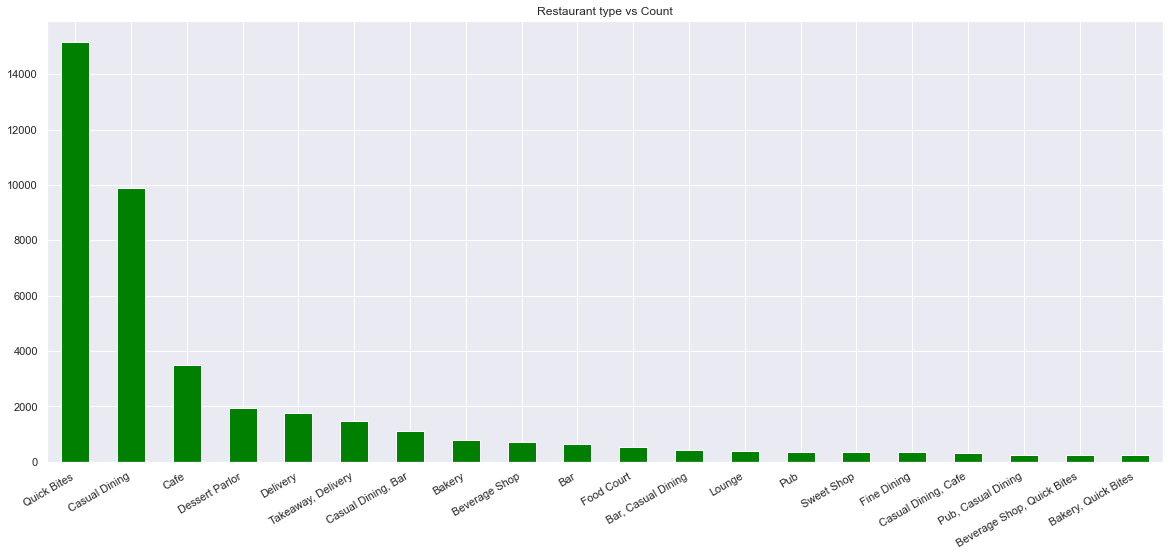

In [176]:
#Restaurant type,largest
plt.figure(figsize=(20,9))
data['rest_type'].value_counts().nlargest(20).plot.bar(color='green')
plt.title('Restaurant type vs Count')
plt.gcf().autofmt_xdate()

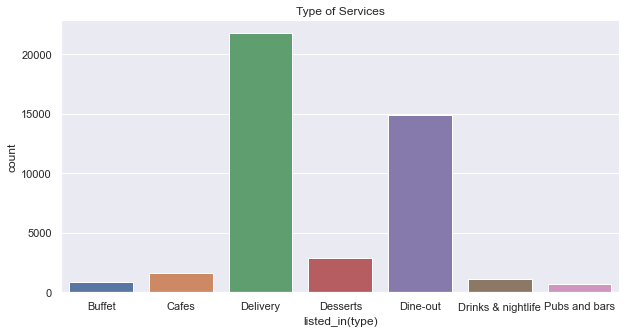

In [177]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=data['listed_in(type)'],ax=ax)
plt.title('Type of Services')
plt.show()

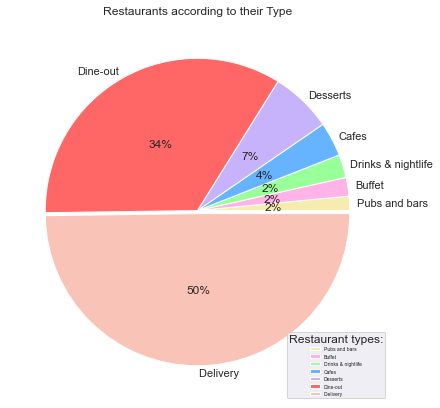

In [178]:
#list_type piechart
rTypeCount=data['listed_in(type)'].value_counts().sort_values(ascending=True)
slices=[rTypeCount[0],
        rTypeCount[1],
        rTypeCount[2],
        rTypeCount[3],
        rTypeCount[4],
        rTypeCount[5],
        rTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
plt.pie(slices,colors=colors, labels=labels,explode=(0.0,0.0,0.0,0.0,0.0,0.0,0.02), autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.05)
plt.legend(title='Restaurant types:',loc=4,prop={'size':5})
fig = plt.gcf()
plt.title("Restaurants according to their Type", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(10,7)
plt.show()

Text(0.5, 0, 'Number of outlets')

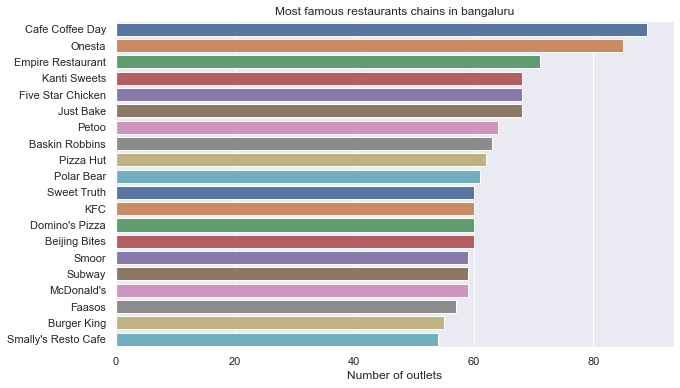

In [179]:
#according to rest_name aju
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
chains=data['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous restaurants chains in bangaluru')
plt.xlabel('Number of outlets')

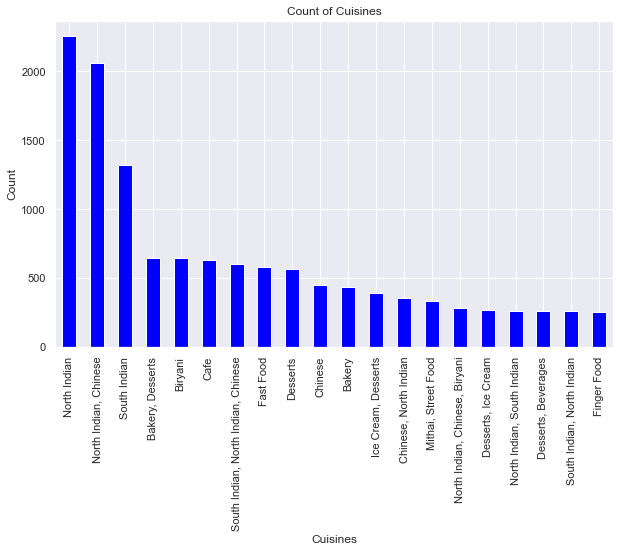

In [180]:
fig,ax=plt.subplots(figsize=(10,6))
data['cuisines'].value_counts()[:20].plot.bar(color='blue')
plt.title('Count of Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()

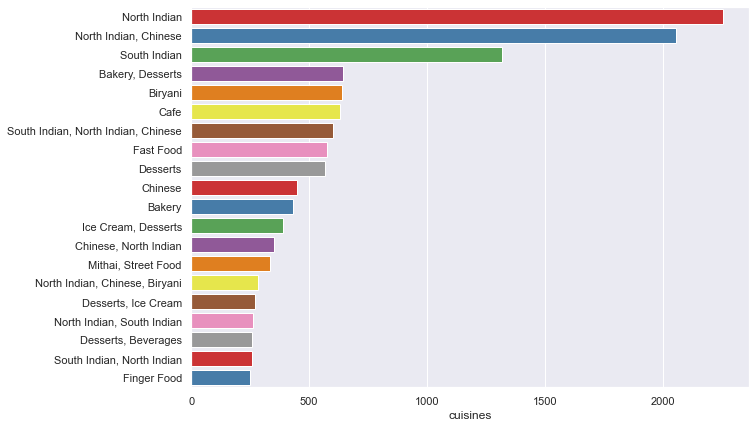

In [181]:
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(x=data['cuisines'].value_counts()[0:20],y=data['cuisines'].value_counts()[0:20].index,palette='Set1')
plt.show()

In [182]:
#barplot of cuisins using go bar
cuisines=data['cuisines'].value_counts()[:10]
trace1=go.Bar(x=cuisines.index,y=cuisines)
iplot([trace1])

In [183]:
#creating new table for rate analysis
df_rate = data.groupby('name')['rate'].mean().to_frame()
df_rate = df_rate.reset_index()
df_rate.columns=['Restaurant','Rating']
df_rate

Restaurant    Rating
0                                     #FeelTheROLL  3.400000
1                                       #L-81 Cafe  3.900000
2                                          #refuel  3.700000
3                                         1000 B.C  3.200000
4             100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
...                                            ...       ...
7127                    i-Bar - The Park Bangalore  3.800000
7128                        iFruit Live Ice Creams  3.400000
7129                             iSpice Resto Cafe  3.700000
7130                                       nu.tree  4.314286
7131  re:cess - Hilton Bangalore Embassy GolfLinks  4.100000

[7132 rows x 2 columns]

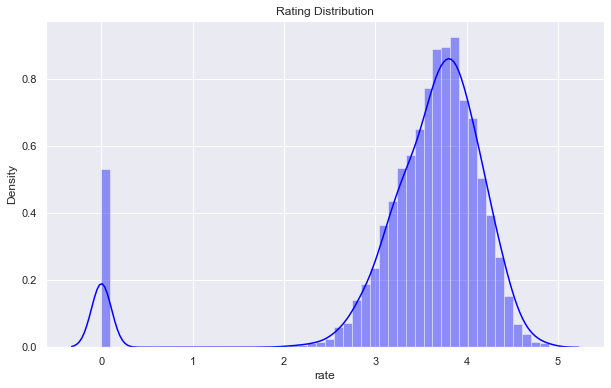

In [184]:
#rating distribution
fig,ax=plt.subplots(figsize=(10,6))
sns.distplot(data['rate'],bins=50,color='blue')
plt.title('Rating Distribution')
plt.show()

In [185]:
data['rate'].max()   #maximum rating out of 5

4.9

In [186]:
data['rate'].min()   #minimum rating out of 5

0.0

In [187]:
(data['rate']>=4).sum() #count of rating more than and equal to 4 

12307

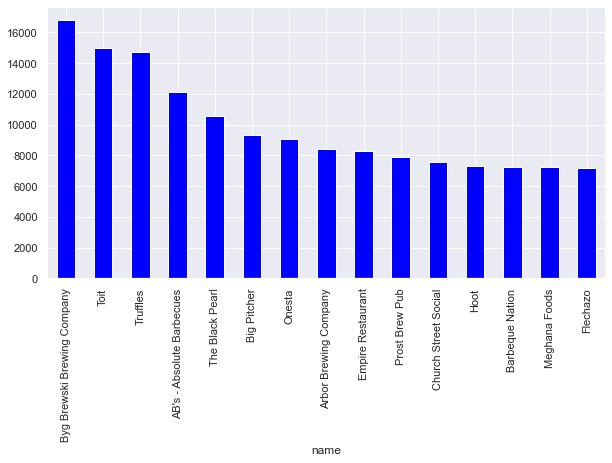

In [188]:
#analysis using voting
fig,ax=plt.subplots(figsize=(10,5))
data.groupby('name')['votes'].max().nlargest(15).plot.bar(color='blue')
plt.show()

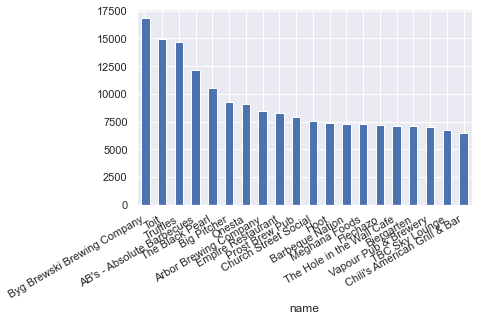

In [189]:
#name and vote
data.groupby('name')['votes'].max().nlargest(20).plot.bar() #highest voted restaurant
plt.gcf().autofmt_xdate()

In [190]:
trace1 = go.Bar(
                x=data.groupby('name')['votes'].max().nlargest(10).index,
                y=data.groupby('name')['votes'].max().nlargest(10),
                name='name')
iplot([trace1])

In [191]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(str)
data['approx_cost(for two people)']=data['approx_cost(for two people)'].apply(lambda y: y.replace(',',''))
data['approx_cost(for two people)']=data['approx_cost(for two people)'].apply(lambda y: float(y))

<AxesSubplot:xlabel='name'>

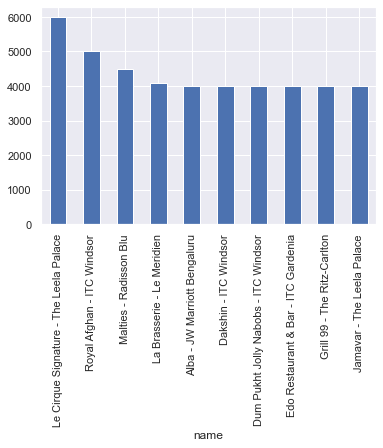

In [192]:
#cost and name(expensive restaurants)
data.groupby('name')['approx_cost(for two people)'].mean().nlargest(10).plot.bar()

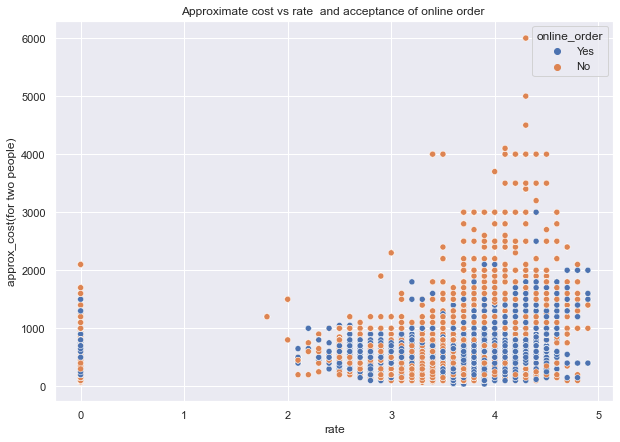

In [193]:
#scatterplot of online order with respect to cost and rate
plt.figure(figsize=(10,7))
sns.scatterplot(x='rate',y='approx_cost(for two people)',hue='online_order',data=data)
plt.title('Approximate cost vs rate  and acceptance of online order ')
plt.show()

<AxesSubplot:xlabel='online_order', ylabel='votes'>

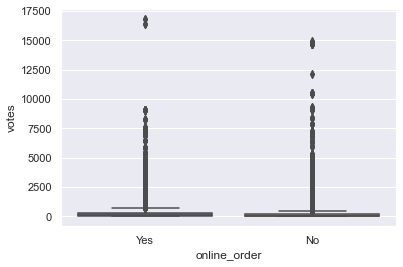

In [194]:
#boxplot for votes and online order
sns.boxplot(x='online_order',y='votes',data=data)

<AxesSubplot:xlabel='online_order', ylabel='approx_cost(for two people)'>

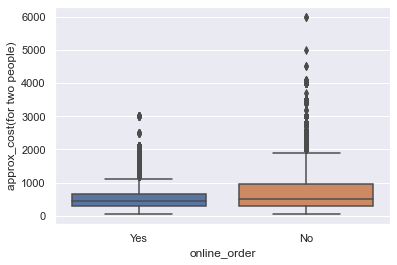

In [195]:
#boxplot for cost and online order
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=data)

In [196]:
# plotly boxplot for cost and online order
fig=px.box(data,x='online_order',y='approx_cost(for two people)')
fig.show()

In [197]:
#distribution of cost for two people
px.histogram(data,x='approx_cost(for two people)',title='Histogram for approximate cost')


In [198]:
#cheapest restaurants using barplot
cost=data['approx_cost(for two people)'].nsmallest(10)
fig=go.Bar(x=cost.index,y=cost)
iplot([fig])

In [199]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head(10)

index  approx_cost(for two people)
0      3                        300.0
1     10                        500.0
2     12                        500.0
3     13                        450.0
4     18                        300.0
5     19                        400.0
6     20                        400.0
7     21                        500.0
8     24                        300.0
9     26                        200.0

<AxesSubplot:>

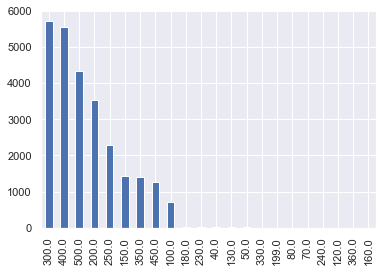

In [200]:
#cost count in budget restaurants
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

Total such various affordable hotels at different location

In [201]:
df_new=data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

In [202]:
location=[]
total=[]
for loc,loc_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(loc_df['name'].unique()))

In [203]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','total']
location_df.set_index('location', inplace=True)
location_df.head(10)

total
location                 
BTM                    54
Banashankari           25
Banaswadi               3
Bannerghatta Road      19
Basavanagudi           31
Basaveshwara Nagar      3
Bellandur              20
Brigade Road           11
Brookefield            16
Church Street           8

In [204]:
c=location_df['total'].nlargest(10)
p=go.Bar(x=c.index,y=c)
iplot([p])

In [205]:
data

address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                    location  \
0            Yes   4.1    775                Banashankari   
1             No   4.1    787                Banashankari   
2             No   3.8    918                Banashankari   
3             No   3.7     88                Banashankari   
4             No   3.8    166                Basavanagudi   
...          ...   ...    ...                         ...   
51709         No   3.7     34                  Whitefield   
51711         No   2.5     81                  Whitefield   
51712         No   3.6     27                  Whitefield   
51715        Yes   4.3    236  ITPL Main Road, Whitefield   
51716         No   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                     cuisines  \
0            Casual Dining               North Indian, Mughlai, Chinese   
1            Casual Dining                  Chinese, North Indian, Thai   
2      Cafe, Casual Dining                       Cafe, Mexican, Italian   
3              Quick Bites                   South Indian, North Indian   
4            Casual Dining                     North Indian, Rajasthani   
...                    ...                                          ...   
51709   Casual Dining, Bar                    North Indian, Continental   
51711   Casual Dining, Bar  Andhra, South Indian, Chinese, North Indian   
51712                  Bar                                  Continental   
51715                  Bar                                  Finger Food   
51716   Bar, Casual Dining       Finger Food, North Indian, Continental   

       approx_cost(for two people)  \
0                            800.0   
1                            800.0   
2                            800.0   
3                            300.0   
4                            600.0   
...                            ...   
51709                        800.0   
51711                        800.0   
51712                       1500.0   
51715                       2500.0   
51716                       1500.0   

                                            reviews_list menu_item  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1      [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3      [('Rated 4.0', "RATED\n  Great food and proper...        []   
4      [('

# implementing location in our Dataset

In [206]:
#pip install geopy

In [207]:
len(data['location'].unique())

92

In [208]:
locations=pd.DataFrame({'name':data['location'].unique()})

In [209]:
locations['new_name']='Bangalore'+locations['name']

In [210]:
locations.head()

name                     new_name
0        Banashankari        BangaloreBanashankari
1        Basavanagudi        BangaloreBasavanagudi
2         Mysore Road         BangaloreMysore Road
3           Jayanagar           BangaloreJayanagar
4  Kumaraswamy Layout  BangaloreKumaraswamy Layout

In [211]:
from geopy.geocoders import Nominatim

In [212]:
lat_lon=[] #list which store latitude and longitude
geolocator=Nominatim(user_agent='app')
for location in locations['name']:
    location=geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [213]:
locations['geo_loc']=lat_lon

In [214]:
locations.head()

name                     new_name  \
0        Banashankari        BangaloreBanashankari   
1        Basavanagudi        BangaloreBasavanagudi   
2         Mysore Road         BangaloreMysore Road   
3           Jayanagar           BangaloreJayanagar   
4  Kumaraswamy Layout  BangaloreKumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (12.9417261, 77.5755021)  
2          (12.9467026, 77.5300705)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [215]:
locations.to_csv('zomato_locations.csv',index=False)

In [216]:
rest_location=pd.DataFrame(data['location'].value_counts().reset_index())

In [217]:
rest_location.columns=['name','count']
rest_location.head()

name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [218]:
#merge both the dataframes
restaurant_locations=rest_location.merge(locations,on='name',how='left').dropna()
restaurant_locations.head()

name  count                        new_name  \
0                    BTM   4237                    BangaloreBTM   
1  Koramangala 5th Block   2358  BangaloreKoramangala 5th Block   
2                    HSR   2113                    BangaloreHSR   
3            Indiranagar   1892            BangaloreIndiranagar   
4               JP Nagar   1849               BangaloreJP Nagar   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1            (12.9348429, 77.6189768)  
2                (18.1475, 41.538889)  
3            (12.9732913, 77.6404672)  
4            (12.2655944, 76.6465404)

In [219]:
restaurant_locations.shape

(91, 4)

In [220]:
def generateBaseMap(defualt_location=[12.97,77.59],default_zoom_start=12):
    basemap=folium.Map(location=defualt_location,zoom_start=default_zoom_start)
    return basemap

In [221]:
np.array(restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.9521804, 77.6041899), (12.9390255, 77.6238477),
       (-34.0881284, 18.4585622), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (12.848759900000001, 77.64825295827616), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5759389, -74.1254948),
       (32.729455, 74.8708533), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7115495, -74.0104239),
       (13.0093455, 77.6377094), (13.0384423, 77.5647533),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338, 77.55

In [222]:
#unzip it
lat,lon=zip(*np.array(restaurant_locations['geo_loc']))

In [223]:
type(lat)

tuple

In [224]:
restaurant_locations['lat']=lat
restaurant_locations['lon']=lon

In [225]:
restaurant_locations.head()

name  count                        new_name  \
0                    BTM   4237                    BangaloreBTM   
1  Koramangala 5th Block   2358  BangaloreKoramangala 5th Block   
2                    HSR   2113                    BangaloreHSR   
3            Indiranagar   1892            BangaloreIndiranagar   
4               JP Nagar   1849               BangaloreJP Nagar   

                              geo_loc        lat         lon  
0  (45.95485055, -112.49659530324134)  45.954851 -112.496595  
1            (12.9348429, 77.6189768)  12.934843   77.618977  
2                (18.1475, 41.538889)  18.147500   41.538889  
3            (12.9732913, 77.6404672)  12.973291   77.640467  
4            (12.2655944, 76.6465404)  12.265594   76.646540

In [226]:
#!pip install folium

In [227]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [228]:
basemap

In [229]:
restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4237.0],
 [12.9348429, 77.6189768, 2358.0],
 [18.1475, 41.538889, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1711.0],
 [53.5533682, -2.2969019, 1684.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.9521804, 77.6041899, 1318.0],
 [12.9390255, 77.6238477, 1103.0],
 [-34.0881284, 18.4585622, 1084.0],
 [12.9364846, 77.6134783, 1084.0],
 [12.93103185, 77.6782471, 1078.0],
 [12.9277245, 77.6327822, 964.0],
 [12.848759900000001, 77.64825295827616, 963.0],
 [12.920441, 77.6653284, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.9327778, 77.6294052, 864.0],
 [12.9755264, 77.6067902, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 743.0],
 [13.0027353, 77.5703253, 657.0],
 [12.9417261, 77.5755021, 628.0],
 [40.5759389, -74.1254948, 626.0],
 [32.729455, 74.8708533, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.996845, 77.6130165, 574.0],
 [40.7115495, -74.0104239, 550.0],
 [13

In [230]:
HeatMap(restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [231]:
basemap

In [232]:
#north indian
data=pd.read_csv('zomato.csv')
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [233]:
data1=data[data['cuisines']=='North Indian']
data1.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table   rate  votes                             phone  \
5           Yes         No  3.8/5    286  +91 9980040002\r\n+91 9980063005   
50           No         No  3.7/5     21                    +91 8026893211   
72           No         No    NEW      0                    +91 8050884222   
87           No         No  3.5/5     31  +91 8892752997\r\n+91 7204780429   
94           No         No  2.6/5    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

   approx_cost(for two people)  \
5                          600   
50                         450   
72                         150   
87                         200   
94                         600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [234]:
data1.shape

(2913, 17)

In [235]:
north_india=data1.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['name','count']
north_india.head()

name  count
0                BTM    340
1       Banashankari     36
2          Banaswadi     12
3  Bannerghatta Road     75
4       Basavanagudi     21

In [236]:
north_india=north_india.merge(locations,on='name',how='left').dropna()

In [237]:
north_india.head()

name  count                    new_name  \
0                BTM    340                BangaloreBTM   
1       Banashankari     36       BangaloreBanashankari   
2          Banaswadi     12          BangaloreBanaswadi   
3  Bannerghatta Road     75  BangaloreBannerghatta Road   
4       Basavanagudi     21       BangaloreBasavanagudi   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1            (15.8876779, 75.7046777)  
2            (13.0141618, 77.6518539)  
3            (12.9521804, 77.6041899)  
4            (12.9417261, 77.5755021)

In [238]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)

In [239]:
north_india.drop(['geo_loc'],axis=1)

name  count  \
0                             BTM    340   
1                    Banashankari     36   
2                       Banaswadi     12   
3               Bannerghatta Road     75   
4                    Basavanagudi     21   
..                            ...    ...   
63  Varthur Main Road, Whitefield      7   
64                  Vasanth Nagar     22   
65                     Whitefield    188   
66                  Wilson Garden     47   
67                    Yeshwantpur      3   

                                  new_name        lan         lon  
0                             BangaloreBTM  45.954851 -112.496595  
1                    BangaloreBanashankari  15.887678   75.704678  
2                       BangaloreBanaswadi  13.014162   77.651854  
3               BangaloreBannerghatta Road  12.952180   77.604190  
4                    BangaloreBasavanagudi  12.941726   77.575502  
..                                     ...        ...         ...  
63  BangaloreVarthur Main Road, Whitefield  12.941324   77.747110  
64                  BangaloreVasanth Nagar  12.988721   77.585169  
65                     BangaloreWhitefield  53.553368   -2.296902  
66                  BangaloreWilson Garden  12.948934   77.596827  
67                    BangaloreYeshwantpur  13.023830   77.552921  

[68 rows x 5 columns]

In [240]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [241]:
basemap

In [242]:
#south indian
data=pd.read_csv('zomato.csv')
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [243]:
data2=data[data['cuisines']=='South Indian']
data2.head()

url  \
39  https://www.zomato.com/bangalore/maruthi-davan...   
41  https://www.zomato.com/bangalore/havyaka-mess-...   
66  https://www.zomato.com/bangalore/namma-brahmin...   
76  https://www.zomato.com/bangalore/sri-guru-kott...   
91  https://www.zomato.com/bangalore/sunsadm-banas...   

                                              address  \
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   
41  Opp Vinayaka hospital, Near Seetha Circle , 80...   
66  30th Cross, 8th Main, Near Jain Temple, 4th Bl...   
76  49/1, Subbaraoshetty Road, Netkallappa Circle,...   
91  Shop 18 , 3rd cross road,Markandeya Layout, Ba...   

                                           name online_order book_table  \
39                 Maruthi Davangere Benne Dosa          Yes         No   
41                                 Havyaka Mess           No         No   
66                         Namma Brahmin's Idli          Yes         No   
76  Sri Guru Kottureshwara Davangere Benne Dosa          Yes         No   
91                                      Sunsadm           No         No   

     rate  votes                             phone      location  \
39  4.0/5     17                    +91 9019563485  Banashankari   
41  3.9/5     28  +91 9243195843\r\n+91 9243404670  Banashankari   
66  3.6/5     34                    +91 8310555879     Jayanagar   
76  4.1/5    558  +91 9448305384\r\n+91 9060079480  Basavanagudi   
91    NaN      0                    +91 7829290358  Banashankari   

             rest_type                                         dish_liked  \
39         Quick Bites                                                NaN   
41                Mess                                                NaN   
66         Quick Bites                                                NaN   
76         Quick Bites  Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...   
91  Takeaway, Delivery                                                NaN   

        cuisines approx_cost(for two people)  \
39  South Indian                         150   
41  South Indian                         300   
66  South Indian                         100   
76  South Indian                         150   
91  South Indian                         400   

                                         reviews_list  \
39  [('Rated 5.0', "RATED\n  This restaurant serve...   
41  [('Rated 4.0', 'RATED\n  Food is good.very hom...   
66  [('Rated 4.0', 'RATED\n  Quite a cosy & small ...   
76  [('Rated 4.0', 'RATED\n  My go-to benne dosa p...   
91                                                 []   

                                            menu_item listed_in(type)  \
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   
41                                                 []        Delivery   
66  ['Tatte Idli', 'Butter Idli', 'Butter Pudi Idl...        Delivery   
76  ['Benne Dose', 'Benne Kali Dose', 'Open Dose',...        Delivery   
91                                                 []        Delivery   

   listed_in(city)  
39    Banashankari  
41    Banashankari  
66    Banashankari  
76    Banashankari  
91    Banashankari

In [244]:
south_india=data2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['name','count']
south_india.head()

name  count
0                BTM    113
1       Banashankari     86
2          Banaswadi     37
3  Bannerghatta Road     48
4       Basavanagudi     89

In [245]:
south_india=south_india.merge(locations,on='name',how='left').dropna()
south_india.head()

name  count                    new_name  \
0                BTM    113                BangaloreBTM   
1       Banashankari     86       BangaloreBanashankari   
2          Banaswadi     37          BangaloreBanaswadi   
3  Bannerghatta Road     48  BangaloreBannerghatta Road   
4       Basavanagudi     89       BangaloreBasavanagudi   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1            (15.8876779, 75.7046777)  
2            (13.0141618, 77.6518539)  
3            (12.9521804, 77.6041899)  
4            (12.9417261, 77.5755021)

In [246]:
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)

In [247]:
south_india.drop(['geo_loc'],axis=1)

name  count                    new_name        lan  \
0                 BTM    113                BangaloreBTM  45.954851   
1        Banashankari     86       BangaloreBanashankari  15.887678   
2           Banaswadi     37          BangaloreBanaswadi  13.014162   
3   Bannerghatta Road     48  BangaloreBannerghatta Road  12.952180   
4        Basavanagudi     89       BangaloreBasavanagudi  12.941726   
..                ...    ...                         ...        ...   
66      Vasanth Nagar     12      BangaloreVasanth Nagar  12.988721   
67        Vijay Nagar      9        BangaloreVijay Nagar  16.779150   
68         Whitefield     63         BangaloreWhitefield  53.553368   
69      Wilson Garden     15      BangaloreWilson Garden  12.948934   
70        Yeshwantpur      2        BangaloreYeshwantpur  13.023830   

           lon  
0  -112.496595  
1    75.704678  
2    77.651854  
3    77.604190  
4    77.575502  
..         ...  
66   77.585169  
67   74.698169  
68   -2.296902  
69   77.596827  
70   77.552921  

[70 rows x 5 columns]

In [248]:

basemap=generateBaseMap()
HeatMap(south_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap